Lecture: AI I - Basics 

Previous:
[**Chapter 3.3: Visualisation with Matplotlib**](../03_matplotlib.ipynb)

---

# Solution 3.3: Visualisation with Matplotlib

- [Task 1: Full temperature time series](#task-1-full-temperature-time-series)
- [Task 2: Combined yearly temperature scatter](#task-2-combined-yearly-temperature-scatter)
- [Task 3: Normalized histogram function](#task-3-normalized-histogram-function)
- [Task 4: Monthly temperature comparison function](#task-4-monthly-temperature-comparison-function)
- [Task 5: Bar plot of rainfall with mean coloring](#task-5-bar-plot-of-rainfall-with-mean-coloring)
- [Task 6: Inferno colormap image](#task-6-inferno-colormap-image)

> Hint: When doing the exercises put your solution in the designated "Solution" section:
> ```python
> # Solution (put your code here)
> ```

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('../data/matplotlib/temperatures.txt')
date, T = data[np.abs(data[:,1]) != 99,:].transpose()

## Task 1: Full temperature time series
Plot the temperature evolution over the entire time span using a line plot.
Requirements:
- Line plot of `T` vs `date`.
- Title, x/y axis labels (include unit °C), legend.
- Set x-limits to the min/max of `date`.
Hint: Degree symbol: `°C` or in math text `$[^\circ\\mathrm{C}]$`.

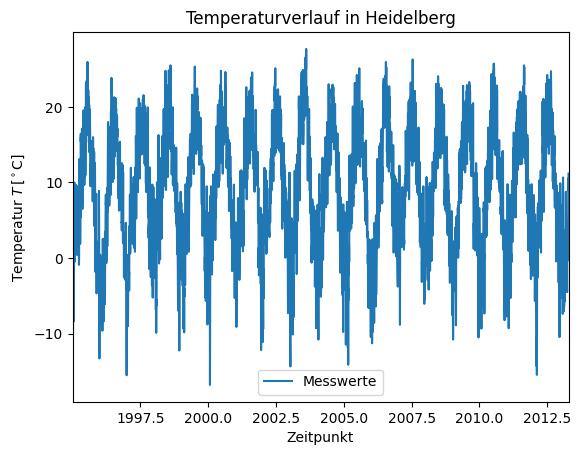

In [4]:
# Solution (put your code here)
fig, ax = plt.subplots()
ax.plot(date, T, label='Messwerte')
ax.set(
    title='Temperaturverlauf in Heidelberg',
    xlim=(np.min(date), np.max(date)),
    xlabel=r'Zeitpunkt',
    ylabel=r'Temperatur $T \, [^\circ{}\mathrm{C}]$'
)

plt.legend()

Check: Does your result look like this?

![](../data/matplotlib/task1.png)

## Task 2: Combined yearly temperature scatter
Create a scatter plot of all temperature measurements folded into a single year.
Requirements:
- x-axis: `date % 1` (fractional part → position within the year).
- Scatter points only (no connecting line), use a small marker like `'.'`.
- Title, x/y axis labels (unit), legend.
- x-limits: 0 to 1.
Hint: You can later experiment with transparency (`alpha`) if points overplot.

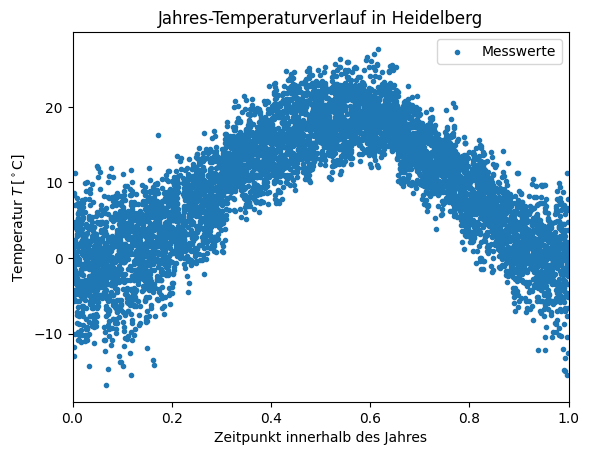

In [ ]:
# Solution (put your code here)
fig, ax = plt.subplots()
ax.scatter(date % 1, T, marker='.', label='Messwerte')
ax.set(
    title='Jahres-Temperaturverlauf in Heidelberg',
    xlim=(0, 1),
    xlabel=r'Zeitpunkt innerhalb des Jahres',
    ylabel=r'Temperatur $T \, [^\circ{}\mathrm{C}]$'
)

plt.legend()

Check: Does your result look like this?

![](../data/matplotlib/task2.png)

## Task 3: Normalized histogram function
Write a function `make_histogram(data)` that returns a Figure containing a normalized histogram (probability density) of a 1D NumPy array.
Requirements:
- Use `density=True`.
- Reasonable automatic binning (`bins='auto'` is fine).
- Label x-axis (`random data`) and y-axis (`density`).
- Return the Figure object at the end of the function.

In [7]:
# prerequisites (don't edit this block)
np.random.seed(1)
hist_data = np.random.normal(loc=0, scale=1, size=1000)

/tmp/ipykernel_31664/3942388506.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


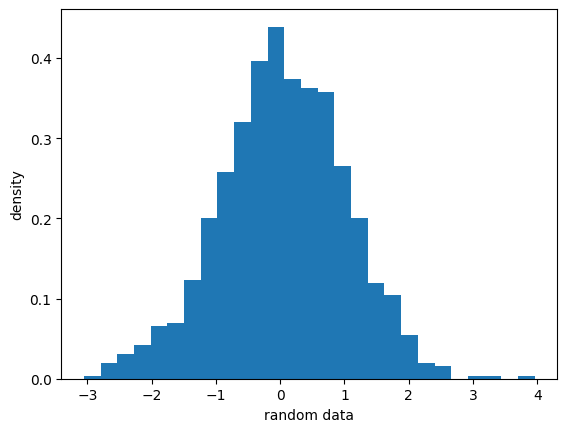

In [ ]:
# Solution (put your code here)
def make_histogram(data):
    fig, ax = plt.subplots()
    ax.hist(data, bins='auto', density=True)
    ax.set_ylabel('density')
    ax.set_xlabel('random data')
    fig.show()

make_histogram(hist_data)

Check: Does your result look like this?

![](../data/matplotlib/task3.png)

## Task 4: Monthly temperature comparison function
Write a function `make_temperature_plot(city_data)` where `city_data` is a dict mapping city name → (12×2) array: column 0 = monthly lows, column 1 = monthly highs.
Requirements:
- Create a Figure with two stacked subplots (shared x optional): top = lows, bottom = highs.
- Plot both cities in each subplot with markers (e.g. `'o'`) and legend.
- y-limits: -5 to 30 on both subplots (for comparability).
- Bottom subplot: x-axis label `Month` (1–12).
- Add a suptitle: `Average temperatures in <cities>`.
- Return the Figure.
Hint: Use `figure, (ax_low, ax_high) = plt.subplots(2, 1, sharex=True)`.

In [11]:
# prerequisites (don't edit this block)
temperature_data = {
    'Osnabrueck': np.array([[ 0,  4], [-1,  4], [ 2,  8], [ 4, 12], [ 8, 17], [11, 20],
                             [13, 22], [13, 22], [11, 18], [ 7, 13], [ 3,  8], [ 1,  5]]),
    'Trento':      np.array([[ 4,  8], [ 3,  8], [ 5, 10], [ 8, 13], [12, 18], [16, 22],
                             [18, 25], [18, 24], [15, 21], [12, 16], [ 7, 12], [ 5,  9]])
}

In [41]:
[*zip(temperature_data["Osnabrueck"].T, temperature_data["Trento"].T)]

[(array([ 0, -1,  2,  4,  8, 11, 13, 13, 11,  7,  3,  1]),
  array([ 4,  3,  5,  8, 12, 16, 18, 18, 15, 12,  7,  5])),
 (array([ 4,  4,  8, 12, 17, 20, 22, 22, 18, 13,  8,  5]),
  array([ 8,  8, 10, 13, 18, 22, 25, 24, 21, 16, 12,  9]))]

<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_31664/2781661635.py:13: SyntaxWarning: invalid escape sequence '\c'
  ylabel="Temperature $[^\circ{}\mathrm{C}]$",
/tmp/ipykernel_31664/2781661635.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


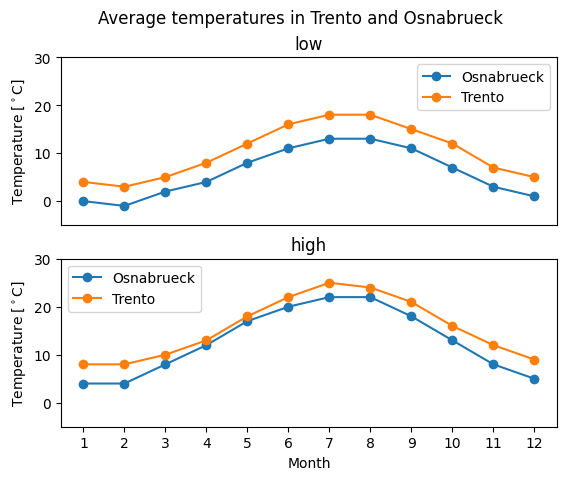

In [44]:
# Solution (put your code here)
def make_temperature_plot(city_data):
    fig, axes = plt.subplots(2, 1)

    for i, (ax, data_osna, data_trento) in enumerate(zip(
        axes,
        city_data["Osnabrueck"].T, 
        city_data["Trento"].T
    )):
        ax.set(
            ylim=[-5, 30], 
            title="low" if i == 0 else "high", 
            ylabel="Temperature $[^\circ{}\mathrm{C}]$",
            xlabel="" if i == 0 else "Month",
            xticks=[] if i == 0 else range(1, 13)
        )
        ax.plot(range(1, 13), data_osna, label="Osnabrueck", marker="o")
        ax.plot(range(1, 13), data_trento, label="Trento", marker="o")
        ax.legend(loc=None if i == 0 else "upper left")

    fig.suptitle('Average temperatures in Trento and Osnabrueck')
    fig.show()

make_temperature_plot(temperature_data)

Check: Does your result look like this?

![](../data/matplotlib/task4.png)

## Task 5: Bar plot of rainfall with mean coloring
Write a function `make_barplot(data)` where `data` maps city → annual rainfall value.
Requirements:
- Sort cities descending by rainfall.
- Plot bars.
- Compute mean rainfall; draw horizontal dashed gray line at the mean.
- Color bars: below mean = `rgb(255, 99, 71)` (Tomato), above mean = `#4682B4` (SteelBlue).
- Rotate x tick labels 25° and right-align (`ha='right'`).
- y-axis label with unit (e.g. `Rainfall in 2004 [L/m^2]`).
- Add legend entry for the mean line.
- Return the Figure.
Hint: Convert the RGB tuple to 0–1 floats or use the hex form for consistency.

In [46]:
# prerequisites (don't edit this block)
rain_data = {
    'Bielefeld': 906,
    'Köln': 886,
    'Hamburg': 806,
    'Karlsruhe': 658,
    'Hannover': 675,
    'Darmstadt': 656,
    'Stuttgart': 616,
    'Berlin': 563,
    'Frankfurt': 555,
    'Weimar': 508,
}

/tmp/ipykernel_31664/1182813867.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cities, rotation=25, ha="right")
/tmp/ipykernel_31664/1182813867.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


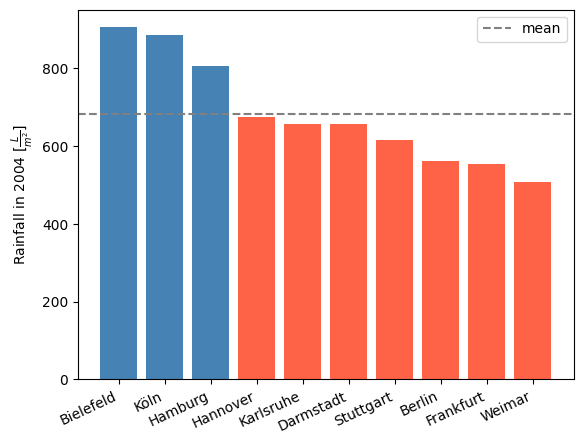

In [56]:
# Solution (put your code here)
def make_barplot(data):
    cities, temps = zip(*sorted(rain_data.items(), key=lambda x: x[1], reverse=True))
    mean = sum(temps) / len(temps)
    color = [
        "#4682B4" if temp > mean else (255/255, 99/255, 71/255) 
        for temp in temps
    ]

    fig, ax = plt.subplots()
    ax.bar(cities, temps, color=color)
    ax.axhline(mean, linestyle='--', color="grey", label="mean")
    ax.set_xticklabels(cities, rotation=25, ha="right")
    ax.set_ylabel("Rainfall in 2004 [$\\frac{L}{m^2}$]")
    ax.legend()
    fig.show()

make_barplot(rain_data)

Check: Does your result look like this?

![](../data/matplotlib/task5.png)

## Task 6: Inferno colormap image
Write a function `make_inferno_image(img_data)` that displays a 2D array (or one channel of an image) using the `inferno` colormap.
Requirements:
- Use `imshow` with `cmap='inferno'`.
- Fix value range with `vmin=0`, `vmax=1` (assume normalized data).
- Hide axes (`ax.axis('off')`).
- Add a colorbar spanning 0→1.
- Return the Figure.
If the loaded image is RGB uint8 (0–255), normalize a channel: `channel = img_data[...,0]/255`.

In [58]:
# prerequisites (don't edit this block)
kitty_data = plt.imread('../data/matplotlib/stinkbug.png')  # Adjust path if needed.

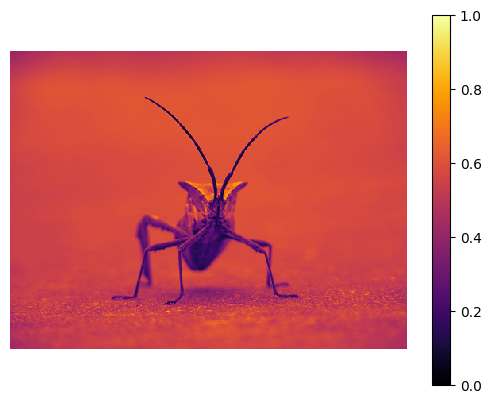

In [61]:
# Solution (put your code here)
def make_inferno_image(img_data):
    fig, ax = plt.subplots()
    im = ax.imshow(img_data[:, :, 0], cmap='inferno', interpolation='nearest', vmin=0, vmax=1)
    ax.axis('off')
    fig.colorbar(im)

make_inferno_image(kitty_data)

Check: Does your result look like this?

![](../data/matplotlib/task6.png)

---

Lecture: AI I - Basics 

Next: [**Chapter 3.4: Visualisation with Seaborn**]()